In [1]:
%load_ext autoreload
%autoreload 2

from datetime import timedelta, timezone, date, timedelta, datetime
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

import sunrise_equation as seq

# 1. Explore code first

In [2]:
human_coord = "48°50′N 2°13′E" # Saint-Cloud
human_coord = "48°51′24″N 2°21′8″E" # Paris
human_coord = "33°26′15″S 70°39′00″W" # Santiago
seq.human2deg(human_coord)

(-33.4375, -70.65)

In [3]:
logging.basicConfig(level=logging.DEBUG)
latitude = 33.00801
longitude = 35.08794
elevation = 0
print(seq.calc(time(), latitude, longitude, elevation, debugtz=timezone(timedelta(hours=3), 'fake-zone')))

DEBUG:root:Latitude               f       = ∠0.576rad = ∠33°0′28″ = ∠33.008°
DEBUG:root:Longitude              l_w     = ∠0.612rad = ∠35°5′16″ = ∠35.088°
DEBUG:root:Now                    ts      = 2024-01-11 17:49:15.647656+03:00
DEBUG:root:Julian date            j_date  = 2460321.118 days
DEBUG:root:Julian day             n       = 8777.000 days
DEBUG:root:Mean solar time        J_      = 8776.903433500 days
DEBUG:root:Solar mean anomaly     M       = ∠0.140rad = ∠8°2′51″ = ∠8.048°
DEBUG:root:Equation of the center C       = ∠0.005rad = ∠0°16′25″ = ∠0.274°
DEBUG:root:Ecliptic longitude     L       = ∠5.083rad = ∠291°15′30″ = ∠291.259°
DEBUG:root:Solar transit time     J_trans = 1705052923.651533 = 2024-01-12 12:48:43.651533+03:00
DEBUG:root:Hour angle             w0      = ∠1.328rad = ∠76°4′34″ = ∠76.076°
DEBUG:root:Sunrise                j_rise  = 1705034665.33214 = 2024-01-12 07:44:25.332140+03:00
DEBUG:root:Sunset                 j_set   = 1705071181.9709256 = 2024-01-12 17:53:01.

(1705034665.33214, 1705071181.9709256, 1705052923.651533, 36516.63878057627)


In [5]:
human_coord = "48°50′N 2°13′E" # Saint-Cloud
# human_coord = "48°51′24″N 2°21′8″E" # Paris
# human_coord = "33°26′15″S 70°39′00″W" # Santiago

lat, long = seq.human2deg(human_coord)
ts_rise, ts_set, ts_transit, day_length = \
    seq.calc(time(), lat, long, debugtz=timezone(timedelta(hours=1), 'fake-zone'))

DEBUG:root:Latitude               f       = ∠0.852rad = ∠48°50′0″ = ∠48.833°
DEBUG:root:Longitude              l_w     = ∠0.039rad = ∠2°13′0″ = ∠2.217°
DEBUG:root:Now                    ts      = 2024-01-11 09:55:03.820333+01:00
DEBUG:root:Julian date            j_date  = 2460320.872 days
DEBUG:root:Julian day             n       = 8776.000 days
DEBUG:root:Mean solar time        J_      = 8775.994742593 days
DEBUG:root:Solar mean anomaly     M       = ∠0.125rad = ∠7°9′7″ = ∠7.152°
DEBUG:root:Equation of the center C       = ∠0.004rad = ∠0°14′36″ = ∠0.243°
DEBUG:root:Ecliptic longitude     L       = ∠5.067rad = ∠290°19′57″ = ∠290.333°
DEBUG:root:Solar transit time     J_trans = 1704974391.2525117 = 2024-01-11 12:59:51.252512+01:00
DEBUG:root:Hour angle             w0      = ∠1.120rad = ∠64°9′15″ = ∠64.154°
DEBUG:root:Sunrise                j_rise  = 1704958994.2138777 = 2024-01-11 08:43:14.213878+01:00
DEBUG:root:Sunset                 j_set   = 1704989788.2911458 = 2024-01-11 17:16:28.

In [6]:
print(ts_set - ts_rise)
print(day_length)

30794.077268123627
30794.077272080045


# 2. Calculations for the whole year (must restart notebook!)

In [2]:
logging.basicConfig(level=logging.CRITICAL)

In [3]:
human_coord = "48°50′N 2°13′E" # Saint-Cloud

lat, long = seq.human2deg(human_coord)

In [4]:
# consider the start date as 2021-february 1 st
today = datetime(2024, 1, 1)

# consider the end date as 2021-march 1 st
end_date = datetime(2025, 1, 1)

# delta time
delta = timedelta(days=1)

# iterate over range of dates
data = {"ts_rise": [], "ts_set": [], "ts_transit": [], "day_length": []}
while (today <= end_date):
	ts_rise, ts_set, ts_transit, day_length = \
        seq.calc(today.timestamp(), lat, long, debugtz=timezone(timedelta(hours=1), 'fake-zone'))
	
	data["ts_rise"].append(datetime.fromtimestamp(ts_rise))
	data["ts_set"].append(datetime.fromtimestamp(ts_set))
	data["ts_transit"].append(datetime.fromtimestamp(ts_transit))
	data["day_length"].append(day_length / 3600)
	
	today += delta

data = pd.DataFrame(data)
data

,ts_rise,ts_set,ts_transit,day_length
0,2024-01-01 08:45:45.104791,2024-01-01 17:05:16.512532,2024-01-01 12:55:30.808662,8.325391
1,2024-01-02 08:45:43.226708,2024-01-02 17:06:13.652436,2024-01-02 12:55:58.439572,8.341785
2,2024-01-03 08:45:38.377127,2024-01-03 17:07:13.199689,2024-01-03 12:56:25.788408,8.359673
3,2024-01-04 08:45:30.564496,2024-01-04 17:08:15.091286,2024-01-04 12:56:52.827891,8.379035
4,2024-01-05 08:45:19.800241,2024-01-05 17:09:19.262292,2024-01-05 12:57:19.531267,8.399851
...,...,...,...,...
362,2024-12-28 08:45:30.552708,2024-12-28 17:02:27.688906,2024-12-28 12:53:59.120807,8.282538
363,2024-12-29 08:45:38.381754,2024-12-29 17:03:16.574981,2024-12-29 12:54:27.478368,8.293943
364,2024-12-30 08:45:43.233387,2024-12-30 17:04:08.056336,2024-12-30 12:54:55.644861,8.306895
365,2024-12-31 08:45:45.105757,2024-12-31 17:05:02.078091,2024-12-31 12:55:23.591924,8.321381


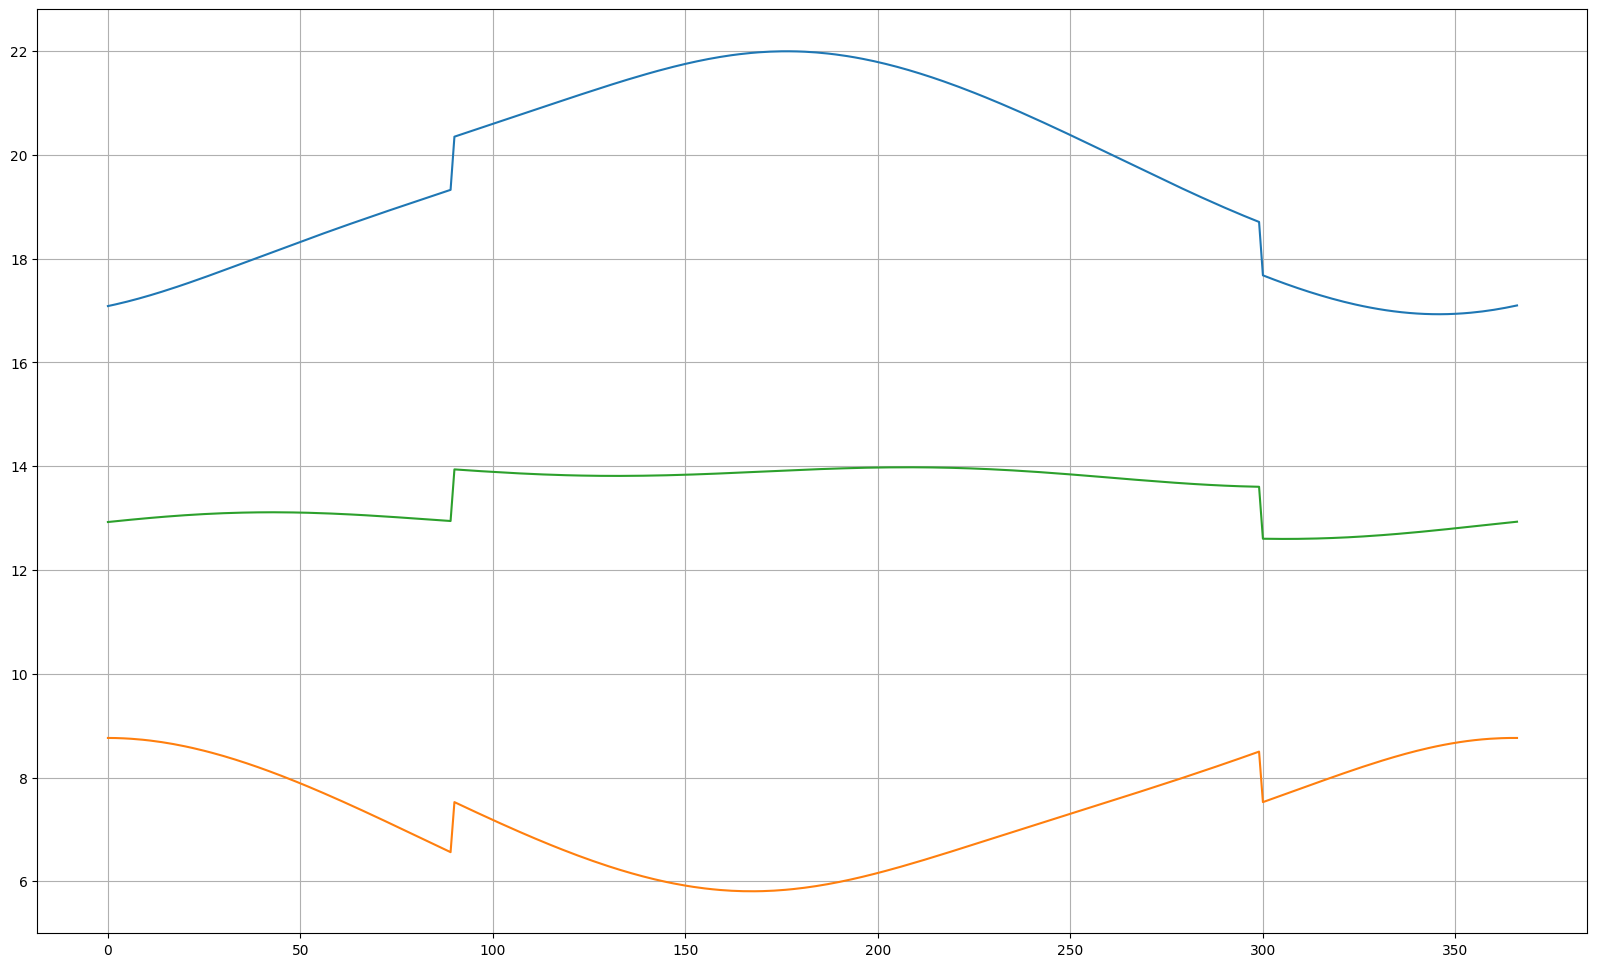

In [27]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(data["ts_set"].dt.hour + data["ts_set"].dt.minute/60 + data["ts_set"].dt.second/3600)
ax.plot(data["ts_rise"].dt.hour + data["ts_rise"].dt.minute/60 + data["ts_rise"].dt.second/3600)
ax.plot(data["ts_transit"].dt.hour + data["ts_transit"].dt.minute/60 + data["ts_transit"].dt.second/3600)

ax.grid()

plt.show()

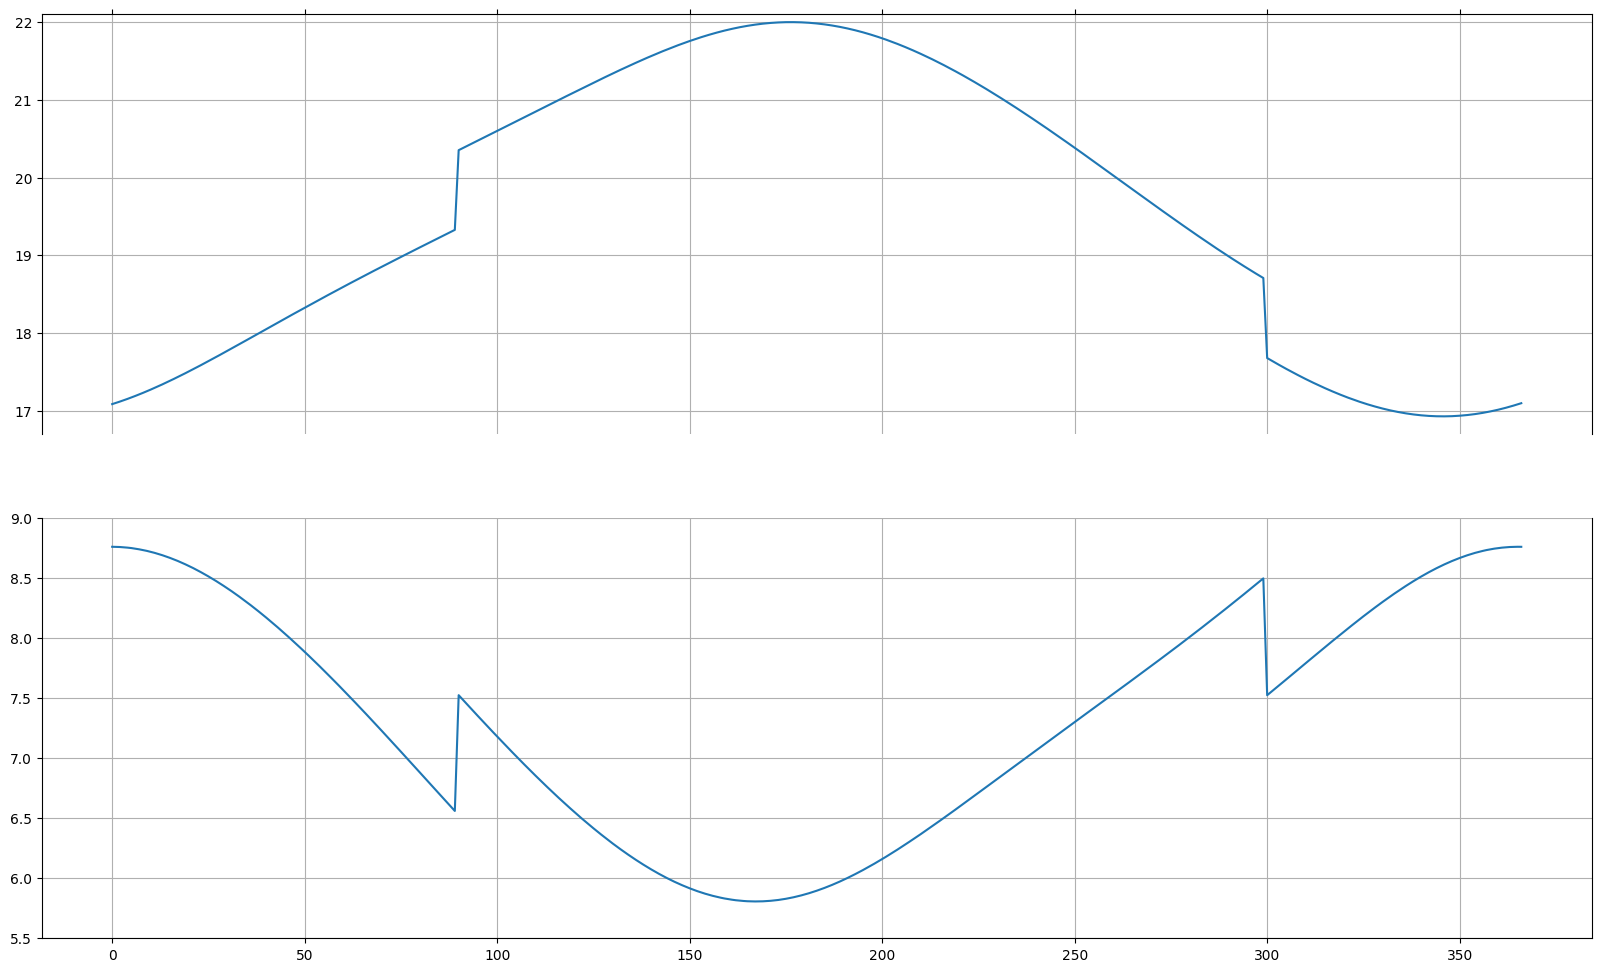

In [28]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 12))

ax[0].plot(data["ts_set"].dt.hour + data["ts_set"].dt.minute/60 + data["ts_set"].dt.second/3600)
ax[1].plot(data["ts_rise"].dt.hour + data["ts_rise"].dt.minute/60 + data["ts_rise"].dt.second/3600)

# zoom-in / limit the view to different portions of the data
ax[0].set_ylim(16.7, 22.1)  # most of the data
ax[1].set_ylim(5.5, 9.)  # outliers only

# hide the spines between ax and ax2
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].xaxis.tick_top()
ax[0].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1].xaxis.tick_bottom()

ax[0].grid()
ax[1].grid()

plt.show()

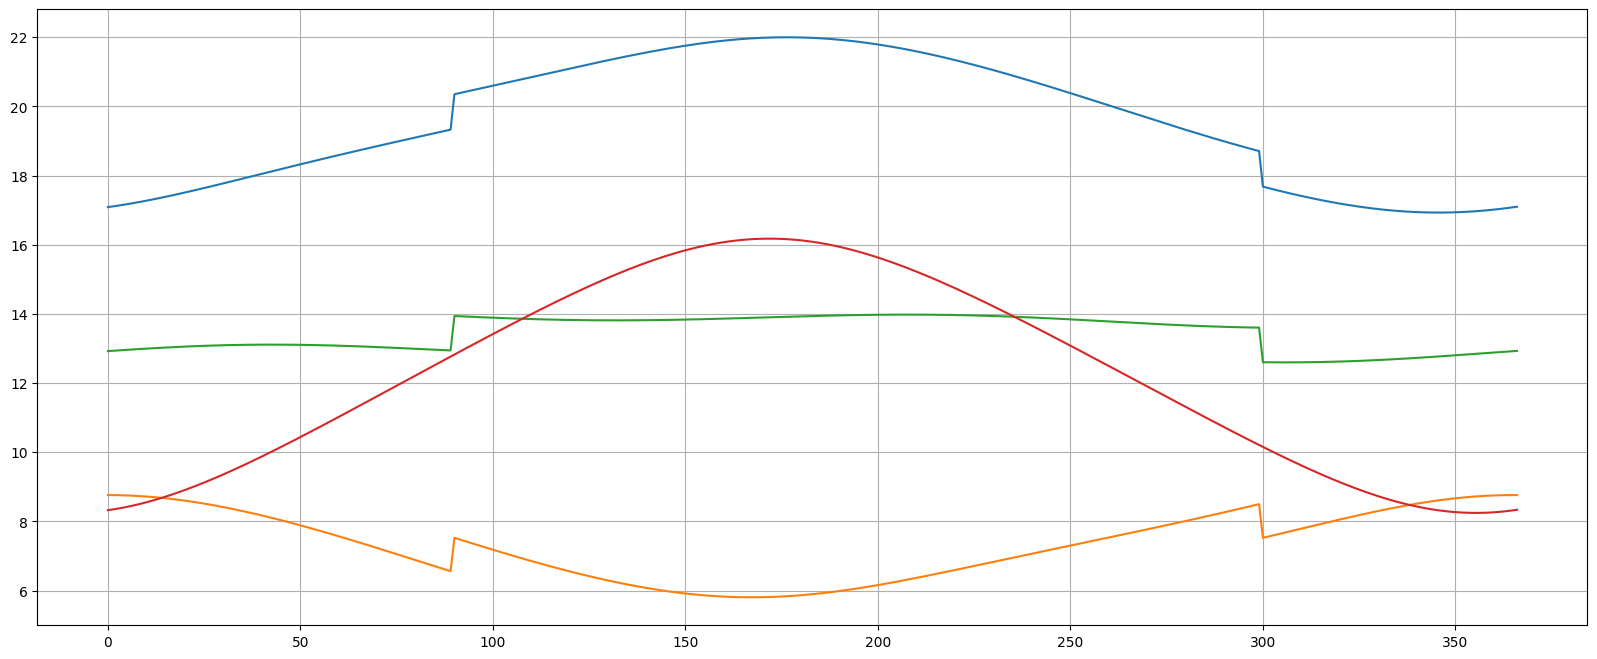

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data["ts_set"].dt.hour + data["ts_set"].dt.minute/60 + data["ts_set"].dt.second/3600)
ax.plot(data["ts_rise"].dt.hour + data["ts_rise"].dt.minute/60 + data["ts_rise"].dt.second/3600)
ax.plot(data["ts_transit"].dt.hour + data["ts_transit"].dt.minute/60 + data["ts_transit"].dt.second/3600)
ax.plot(data["day_length"])

ax.grid()

# ax.set_xlim(297, 301)

plt.show()

Correct for the daylight sayving:

In [30]:
data_no_dts = data.copy()

In [31]:
data_no_dts["ts_rise"].iloc[90:300] = data["ts_rise"].iloc[90:300] - pd.Timedelta(hours=1)
data_no_dts["ts_set"].iloc[90:300] = data["ts_set"].iloc[90:300] - pd.Timedelta(hours=1)
data_no_dts["ts_transit"].iloc[90:300] = data["ts_transit"].iloc[90:300] - pd.Timedelta(hours=1)

/tmp/ipykernel_2656/887942365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_dts["ts_rise"].iloc[90:300] = data["ts_rise"].iloc[90:300] - pd.Timedelta(hours=1)
/tmp/ipykernel_2656/887942365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_dts["ts_set"].iloc[90:300] = data["ts_set"].iloc[90:300] - pd.Timedelta(hours=1)
/tmp/ipykernel_2656/887942365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_dts["

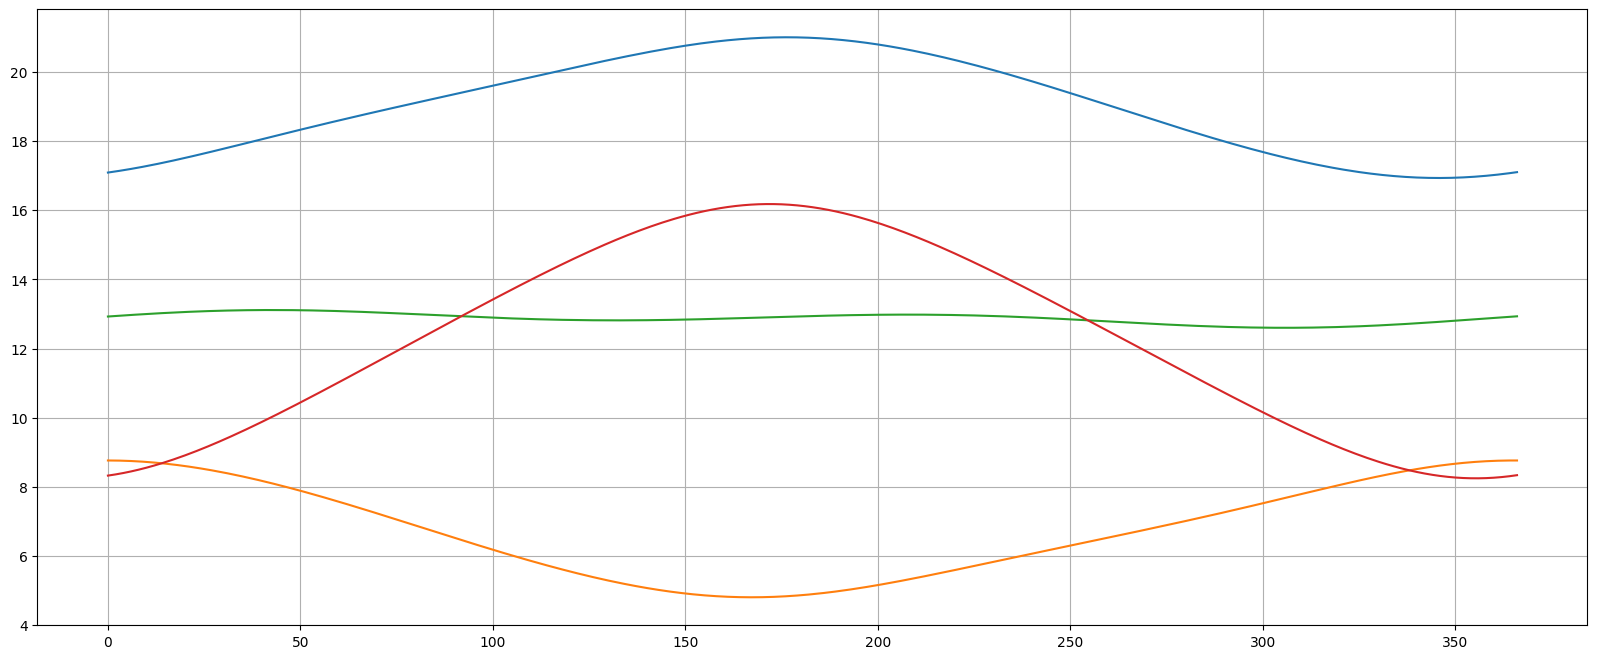

In [32]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data_no_dts["ts_set"].dt.hour + data_no_dts["ts_set"].dt.minute/60 + data_no_dts["ts_set"].dt.second/3600, label="sunrise")
ax.plot(data_no_dts["ts_rise"].dt.hour + data_no_dts["ts_rise"].dt.minute/60 + data_no_dts["ts_rise"].dt.second/3600, label="sunset")
ax.plot(data_no_dts["ts_transit"].dt.hour + data_no_dts["ts_transit"].dt.minute/60 + data_no_dts["ts_transit"].dt.second/3600, label="sun noon")
ax.plot(data_no_dts["day_length"], label="day length")

ax.grid()

# ax.set_xlim(297, 301)

plt.show()

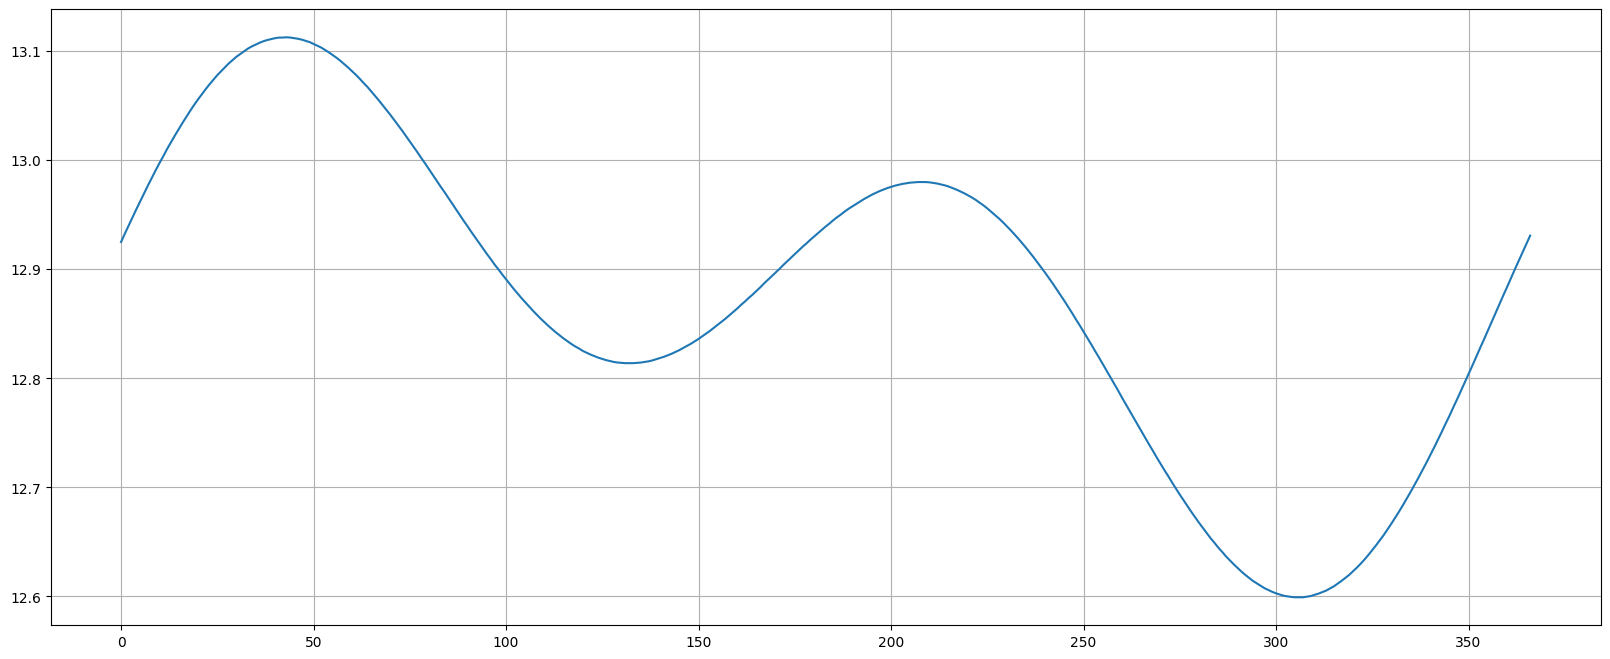

In [33]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data_no_dts["ts_transit"].dt.hour + data_no_dts["ts_transit"].dt.minute/60 + data_no_dts["ts_transit"].dt.second/3600, label="sun noon")

ax.grid()

# ax.set_xlim(297, 301)

plt.show()

Calculate derivatives:

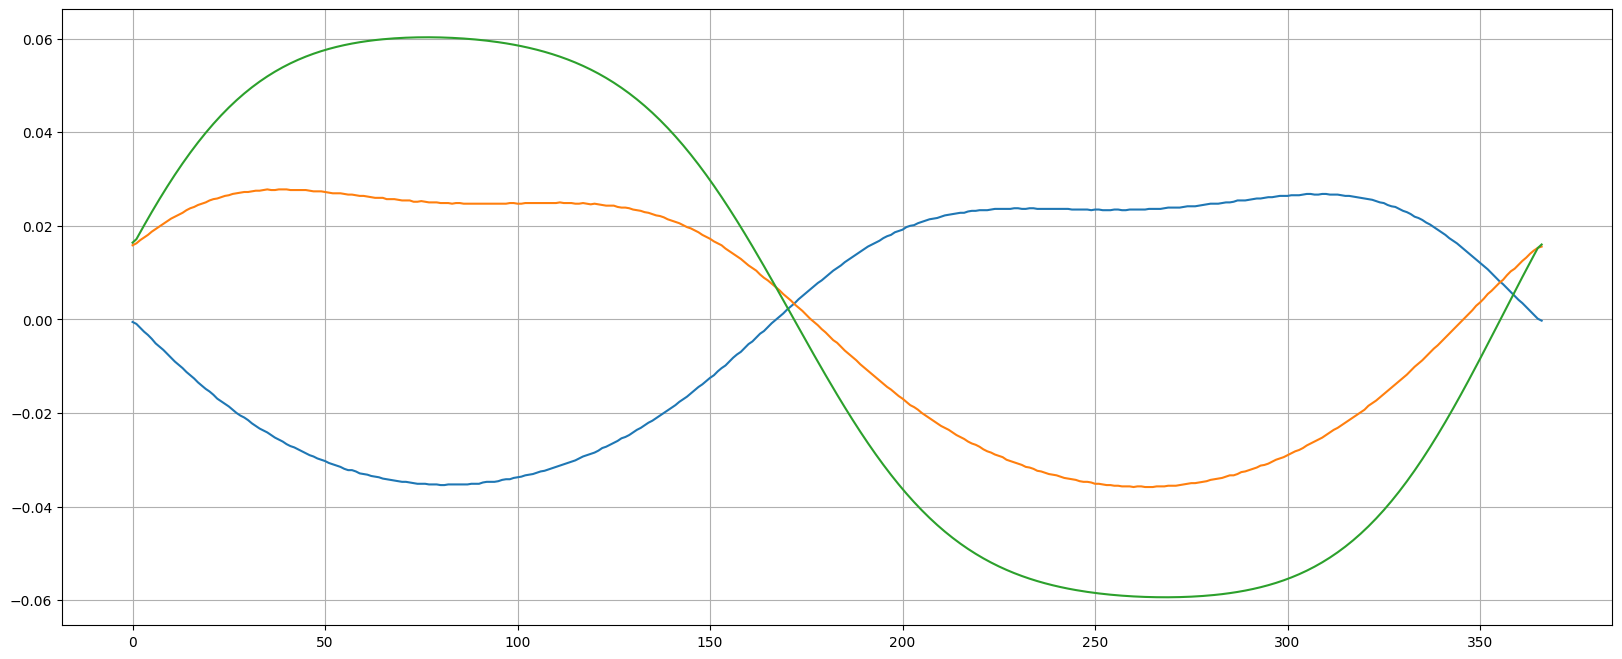

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(np.gradient(data_no_dts["ts_rise"].dt.hour + data_no_dts["ts_rise"].dt.minute/60 + data_no_dts["ts_rise"].dt.second/3600, data_no_dts.index))
ax.plot(np.gradient(data_no_dts["ts_set"].dt.hour + data_no_dts["ts_set"].dt.minute/60 + data_no_dts["ts_set"].dt.second/3600, data_no_dts.index))
ax.plot(np.gradient(data_no_dts["day_length"], data_no_dts.index))

ax.grid()
# ax.set_xlim(160, 180)
# ax.set_xlim(50, 150); ax.set_ylim(0.022, 0.028)

plt.show()